In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/placement.csv')

Text(0, 0.5, 'package in LPA')

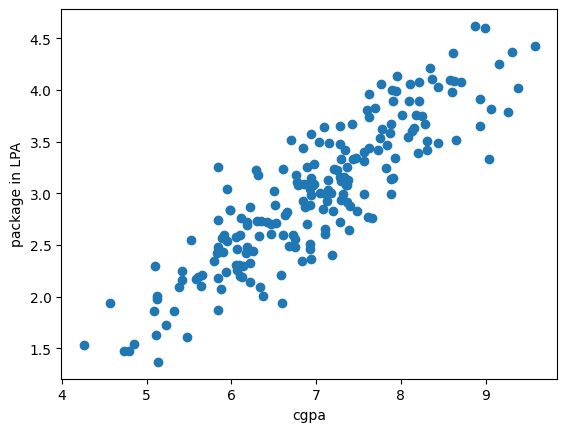

In [5]:
# plot given data
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package in LPA')

In [6]:
# data divided into x(dependent) and y(independent) variable
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [7]:
# for prevent data leakage we split data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
# fit the linear regression model on x_train data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [9]:
# reshape the single value
x_test.iloc[1].values.reshape(1,1)

array([[7.15]])

In [10]:
# first value of x_test data
x_test.iloc[0].values.reshape(1,1)

array([[8.58]])

In [11]:
# first value of y_test
y_test.iloc[0]

4.1

In [12]:
# prediction on single value of x_test
lr.predict(x_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [13]:
y_test.iloc[1]

3.49

In [14]:
lr.predict(x_test.iloc[1].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

Text(0, 0.5, 'package in LPA')

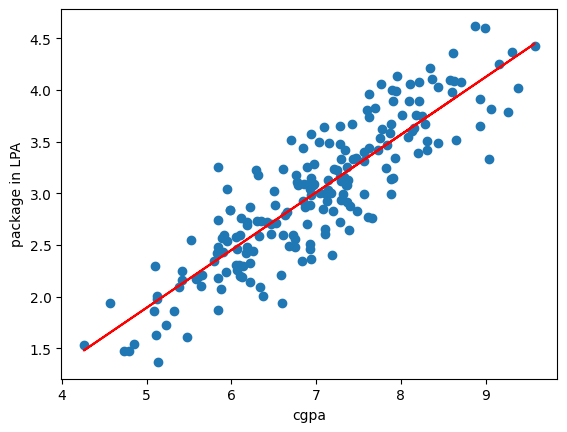

In [15]:
# plot line drawn by model on given data
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package in LPA')

In [16]:
# slope
m = lr.coef_
print('m : ',m)
# intercept
b = lr.intercept_
print('b :',b)
# y = mx + b
y = m*8.58 + b
print('y : ',y)

m :  [0.55795197]
b : -0.8961119222429144
y :  [3.89111601]


# Use Linearegression

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr.predict(x_test)

In [21]:
print('MAE : ',mean_absolute_error(y_test,y_pred))
print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score : ',r2_score(y_test,y_pred))

MAE :  0.2884710931878175
MSE :  0.12129235313495527
RMSE :  0.34827051717731616
r2_score :  0.780730147510384


In [24]:
r2 = r2_score(y_test,y_pred)
adjusted_r2_score = 1-(1-r2)*((x_test.shape[0]-1)/(x_test.shape[0]-1-x_test.shape[1]))
print('Adjusted R2_score : ',adjusted_r2_score)

Adjusted R2_score :  0.7749598882343415
